<a href="https://colab.research.google.com/github/CataGimeno/challenge_telecom_X_PARTE_2_CGR/blob/main/CGR_TelecomX_LATAM_PARTE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('datos_tratados.csv')

In [48]:
df

,fuga,genero,adulto_mayor,tiene_pareja,tiene_dependentes,meses_permanencia,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_en_linea,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7040,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fuga                     7043 non-null   object 
 1   genero                   7043 non-null   object 
 2   adulto_mayor             7043 non-null   int64  
 3   tiene_pareja             7043 non-null   object 
 4   tiene_dependentes        7043 non-null   object 
 5   meses_permanencia        7043 non-null   int64  
 6   servicio_telefonico      7043 non-null   object 
 7   lineas_multiples         7043 non-null   object 
 8   servicio_internet        7043 non-null   object 
 9   seguridad_en_linea       7043 non-null   object 
 10  Soporte_en_linea         7043 non-null   object 
 11  proteccion_dispositivos  7043 non-null   object 
 12  soporte_tecnico          7043 non-null   object 
 13  servicio_tv              7043 non-null   object 
 14  servicio_peliculas      

In [50]:
df.describe()

,adulto_mayor,meses_permanencia,gastos_mensuales,gastos_totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [51]:
# Crear un nuevo DF para dejar datos mas limpios
df_limpio = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos',
    'soporte_tecnico', 'servicio_tv', 'servicio_peliculas'
]

for col in cols_to_fix:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sin dummy trap)
columnas_categoricas = [
       'fuga', 'genero', 'tiene_pareja', 'tiene_dependentes',
       'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
       'seguridad_en_linea', 'Soporte_en_linea',
       'proteccion_dispositivos', 'soporte_tecnico',
       'servicio_tv', 'servicio_peliculas', 'tipo_contrato',
       'facturas_electronicas', 'metodo_pago'
]

df_codificado = pd.get_dummies(df_limpio, columns=columnas_categoricas, drop_first=True)

# ¡Listo para usar!
df_codificado.sample(20)

,adulto_mayor,meses_permanencia,gastos_mensuales,gastos_totales,Cuentas_Diarias,fuga_Yes,genero_Male,tiene_pareja_Yes,tiene_dependentes_Yes,servicio_telefonico_Yes,...,proteccion_dispositivos_Yes,soporte_tecnico_Yes,servicio_tv_Yes,servicio_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturas_electronicas_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
3722,1,8,29.40,221.90,0.980000,True,True,False,False,False,...,True,False,False,False,False,False,True,False,True,False
5959,0,42,69.40,3058.30,2.313333,False,True,True,True,True,...,False,False,True,False,False,False,True,False,False,False
4174,0,31,94.50,2979.20,3.150000,False,True,False,False,True,...,False,False,True,True,False,False,True,False,True,False
3575,0,3,19.90,45.75,0.663333,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True
172,0,66,50.55,3364.55,1.685000,False,True,True,True,False,...,False,True,True,True,False,True,False,False,False,False
5768,0,10,40.70,449.30,1.356667,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1648,0,3,20.00,61.70,0.666667,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4959,0,44,54.30,2317.10,1.810000,False,True,True,True,False,...,True,True,True,True,True,False,True,False,True,False
1081,0,51,19.95,1028.75,0.665000,False,False,True,True,True,...,False,False,False,False,False,True,False,False,False,True
2336,0,8,49.55,393.45,1.651667,False,True,True,False,True,...,False,False,False,False,False,False,True,False,False,False


In [52]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adulto_mayor                         7043 non-null   int64  
 1   meses_permanencia                    7043 non-null   int64  
 2   gastos_mensuales                     7043 non-null   float64
 3   gastos_totales                       7032 non-null   float64
 4   Cuentas_Diarias                      7043 non-null   float64
 5   fuga_Yes                             7043 non-null   bool   
 6   genero_Male                          7043 non-null   bool   
 7   tiene_pareja_Yes                     7043 non-null   bool   
 8   tiene_dependentes_Yes                7043 non-null   bool   
 9   servicio_telefonico_Yes              7043 non-null   bool   
 10  lineas_multiples_No phone service    7043 non-null   bool   
 11  lineas_multiples_Yes          

In [53]:
df_codificado.describe()

,adulto_mayor,meses_permanencia,gastos_mensuales,gastos_totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [54]:
df_codificado.isnull().sum()

,0
adulto_mayor,0
meses_permanencia,0
gastos_mensuales,0
gastos_totales,11
Cuentas_Diarias,0
fuga_Yes,0
genero_Male,0
tiene_pareja_Yes,0
tiene_dependentes_Yes,0
servicio_telefonico_Yes,0


In [55]:
# Verifica valores nulos en las dos columnas
print(df_codificado[['Cuentas_Diarias', 'gastos_totales']].isnull().sum())

Cuentas_Diarias     0
gastos_totales     11
dtype: int64


In [56]:
# Elimina filas con valores nulos en las columnas especificadas
df_codificado = df_codificado.dropna(subset=['gastos_totales'])

In [57]:
#checamos que no hayan datos vacios
df_codificado.isnull().sum()

,0
adulto_mayor,0
meses_permanencia,0
gastos_mensuales,0
gastos_totales,0
Cuentas_Diarias,0
fuga_Yes,0
genero_Male,0
tiene_pareja_Yes,0
tiene_dependentes_Yes,0
servicio_telefonico_Yes,0


In [58]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adulto_mayor                         7032 non-null   int64  
 1   meses_permanencia                    7032 non-null   int64  
 2   gastos_mensuales                     7032 non-null   float64
 3   gastos_totales                       7032 non-null   float64
 4   Cuentas_Diarias                      7032 non-null   float64
 5   fuga_Yes                             7032 non-null   bool   
 6   genero_Male                          7032 non-null   bool   
 7   tiene_pareja_Yes                     7032 non-null   bool   
 8   tiene_dependentes_Yes                7032 non-null   bool   
 9   servicio_telefonico_Yes              7032 non-null   bool   
 10  lineas_multiples_No phone service    7032 non-null   bool   
 11  lineas_multiples_Yes               

In [59]:
#proporción de fuga
fuga_clientes = df_codificado['fuga_Yes'].value_counts()
print(fuga_clientes)


fuga_Yes
False    5163
True     1869
Name: count, dtype: int64


In [60]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = df_codificado.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
df_codificado[colunas_numericas] = scaler.fit_transform(df_codificado[colunas_numericas])

# Mostrando los datos normalizados
df_codificado.head()

,adulto_mayor,meses_permanencia,gastos_mensuales,gastos_totales,Cuentas_Diarias,fuga_Yes,genero_Male,tiene_pareja_Yes,tiene_dependentes_Yes,servicio_telefonico_Yes,...,proteccion_dispositivos_Yes,soporte_tecnico_Yes,servicio_tv_Yes,servicio_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturas_electronicas_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,0.0,0.112676,0.471144,0.066294,0.471144,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.414428,0.060420,0.414428,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.553731,0.030239,0.553731,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.793532,0.140670,0.793532,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.653234,0.028687,0.653234,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [61]:
correlacion = df_codificado.corr()

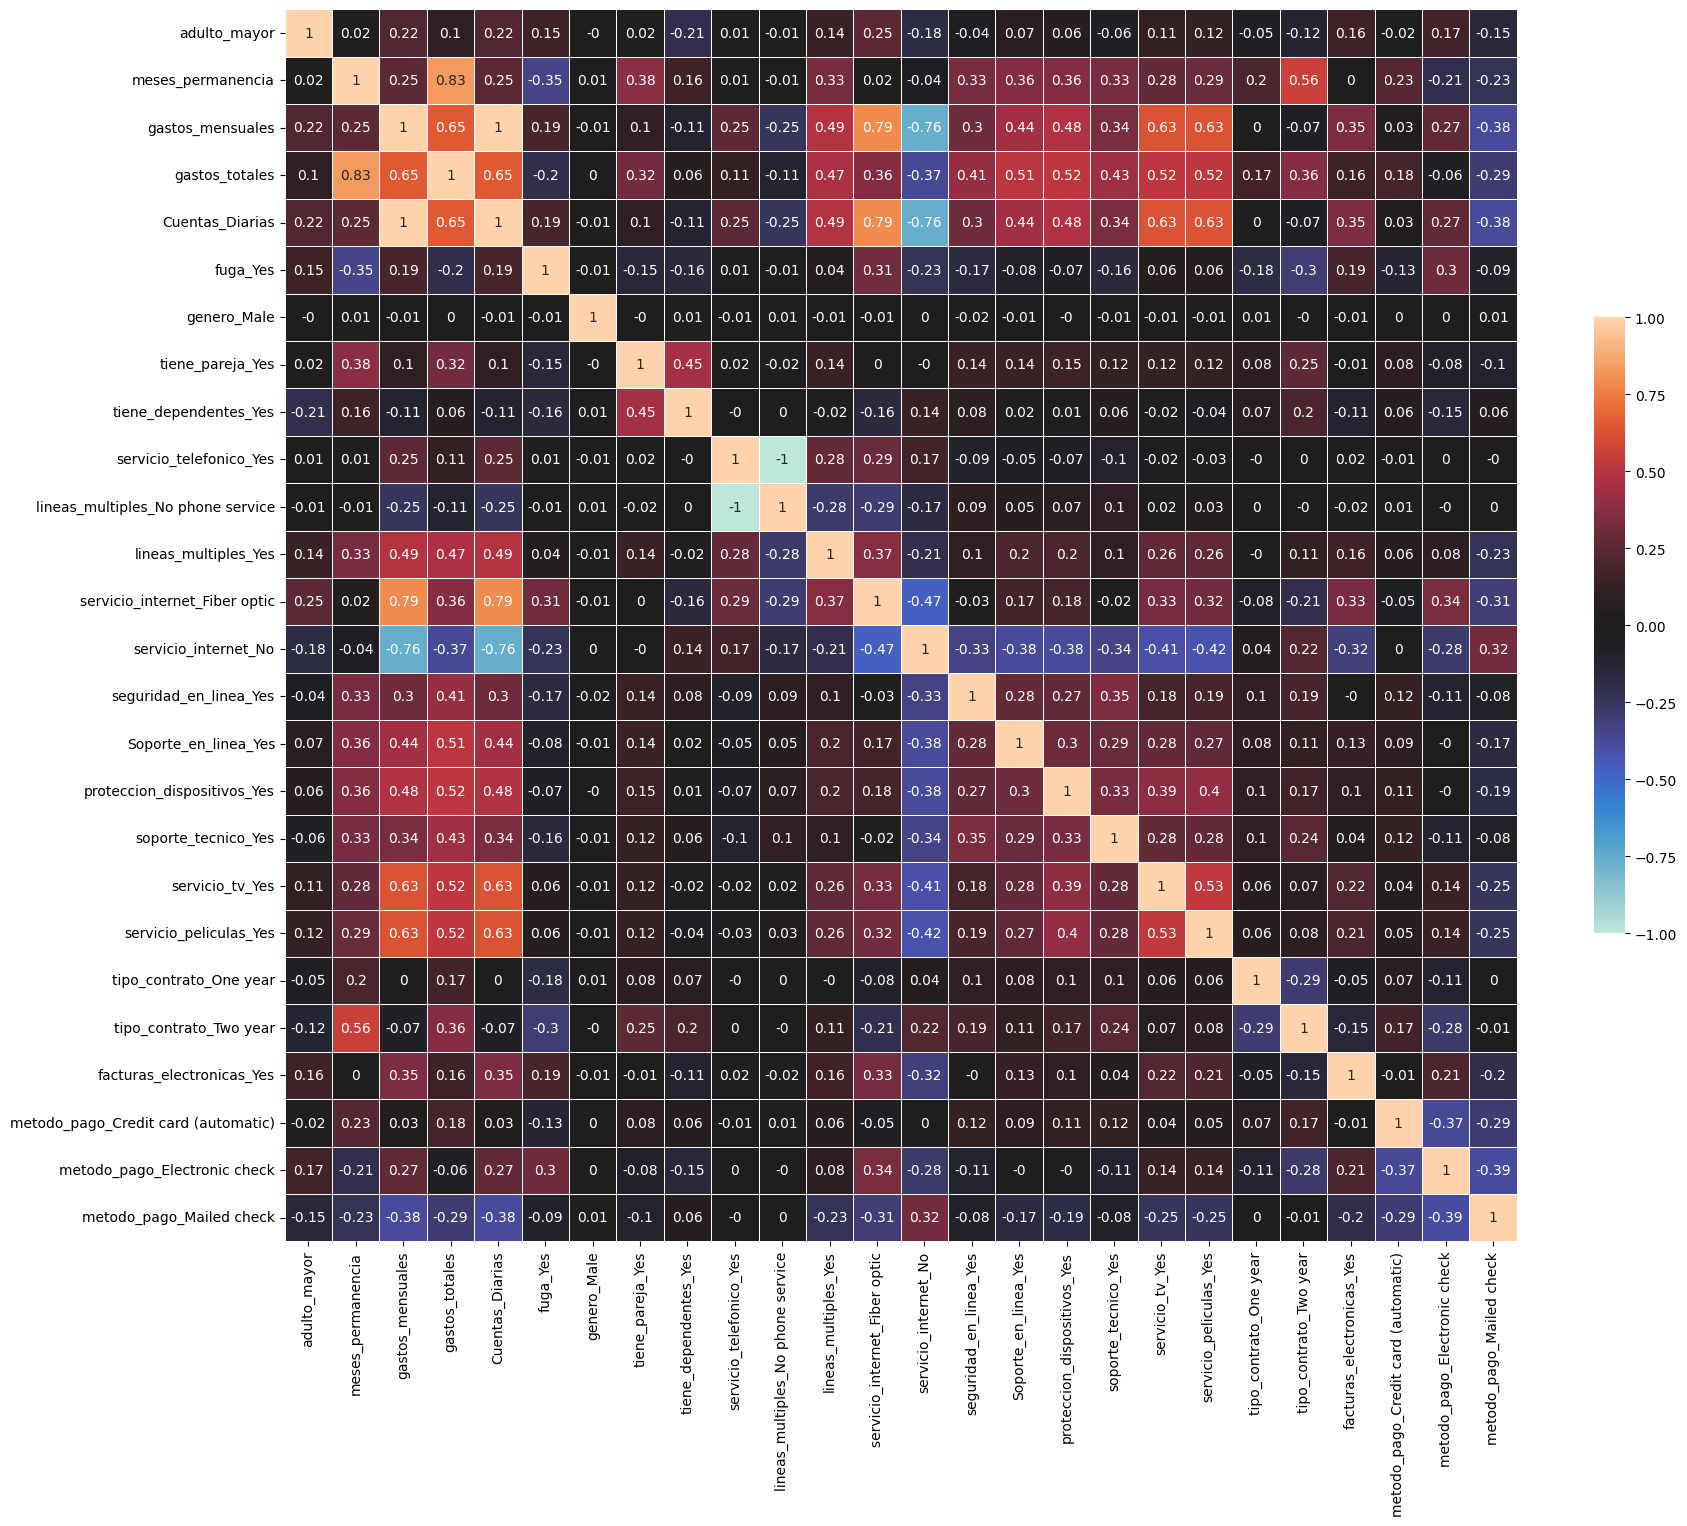

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(correlacion, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

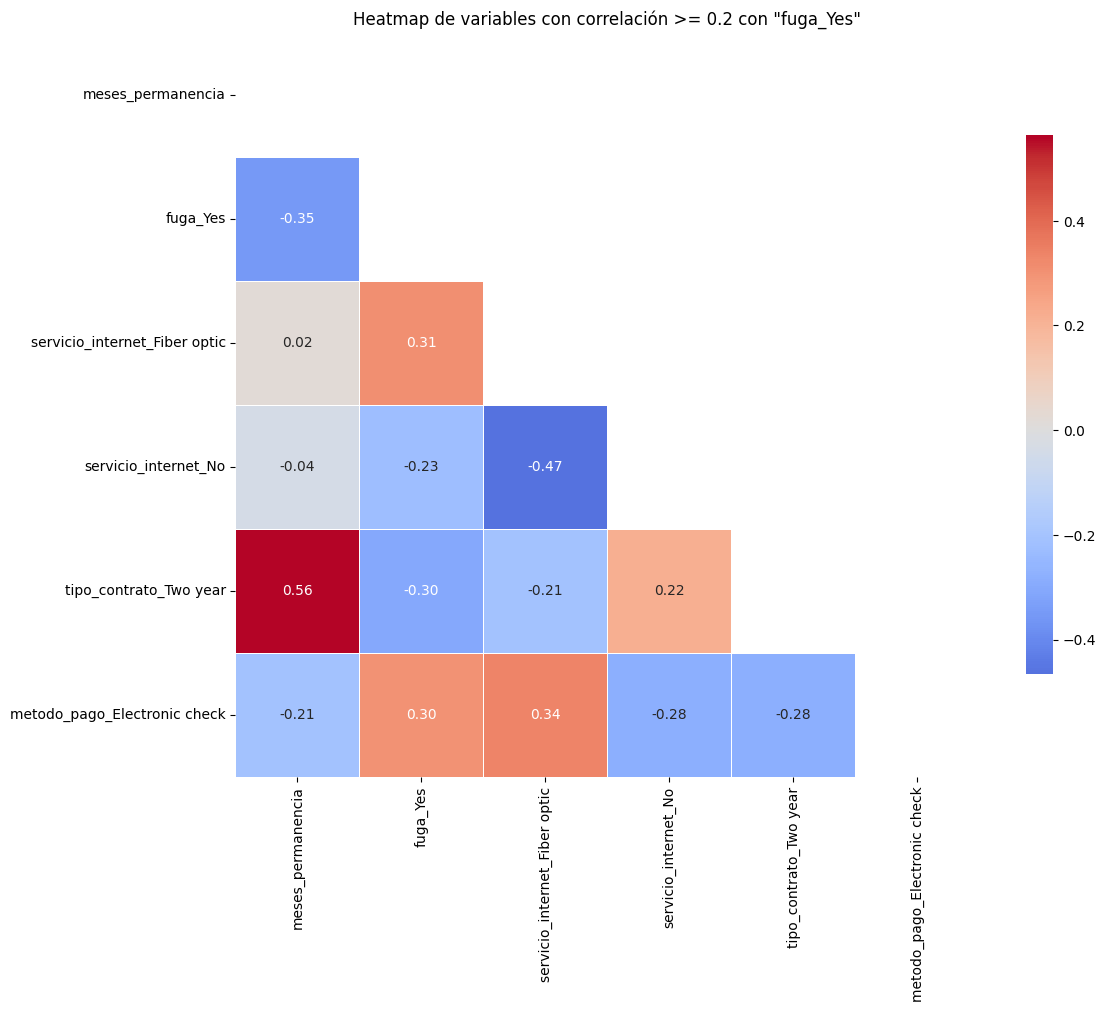

In [64]:
# Definir la variable objetivo
target_var = 'fuga_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = correlacion.index[abs(correlacion[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = correlacion.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "servicio_telefonico_Yes",
    "lineas_multiples_No phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Cuentas_Diarias"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["servicio_internet_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,18.649055
3,gastos_mensuales,18.168780
4,gastos_totales,10.706800
2,meses_permanencia,7.548716
9,servicio_internet_Fiber optic,6.997820
17,tipo_contrato_Two year,2.532131
14,servicio_tv_Yes,2.188547
15,servicio_peliculas_Yes,2.187888
20,metodo_pago_Electronic check,1.967305
21,metodo_pago_Mailed check,1.847752


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Eliminar la variable account.Charges.Total ===
X_final = X_filtered.drop(columns=["gastos_totales"])

# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
3,gastos_mensuales,17.283226
0,const,14.674312
8,servicio_internet_Fiber optic,6.936112
2,meses_permanencia,2.826197
16,tipo_contrato_Two year,2.521228
13,servicio_tv_Yes,2.166619
14,servicio_peliculas_Yes,2.163842
19,metodo_pago_Electronic check,1.964004
20,metodo_pago_Mailed check,1.825717
12,soporte_tecnico_Yes,1.712098


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [79]:
X = df_codificado.drop(columns=['fuga_Yes'])
y = df_codificado['fuga_Yes']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [82]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8454721521216033
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

